In [1]:
install.packages(c("cowplot",
"digest",
"infer",
"repr",
"tidyverse",
"dplyr",
"pillar"))


Installing packages into ‘/home/kolcr/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [2]:
library(cowplot)
library(digest)
library(infer)
library(repr)
library(tidyverse)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [7]:

cleveland <- read.delim('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data', header = FALSE, sep = " ")
cols <- c(24, 32, 76) # used beta blockers?, maxiumum heart rate, name (for data validation)
total_cols <- 76
flattened <- c()

cleaned_cleveland <- tibble(
  beta_blockers = factor(),
  max_heart_rate = numeric(),
  name = character()
)

for(i in 1:nrow(cleveland)) {
    row <- unname(unlist(cleveland[i,]))
    row <- row[row != ""]
    flattened = c(flattened, row)
}
for(i in 0:length(flattened)){
    bb = as.factor(flattened[cols[1] + i*total_cols])
    mhr = as.numeric(flattened[cols[2] + i*total_cols])
    if(is.na(bb) | is.na(mhr) | mhr > 300) break

    if((bb == -9) | (mhr == -9)) {
      next
    }

    cleaned_cleveland <- cleaned_cleveland %>%
        add_row(beta_blockers  = bb,
                max_heart_rate = mhr,
                name           = flattened[cols[3] + i*total_cols])
}
cleaned_cleveland <- cleaned_cleveland %>%
    filter(name == "name") %>%
    select(-name)
head(cleaned_cleveland)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“embedded nul(s) found in input”


beta_blockers,max_heart_rate
<fct>,<dbl>
0,150
1,108
1,129
1,187
0,172
0,178


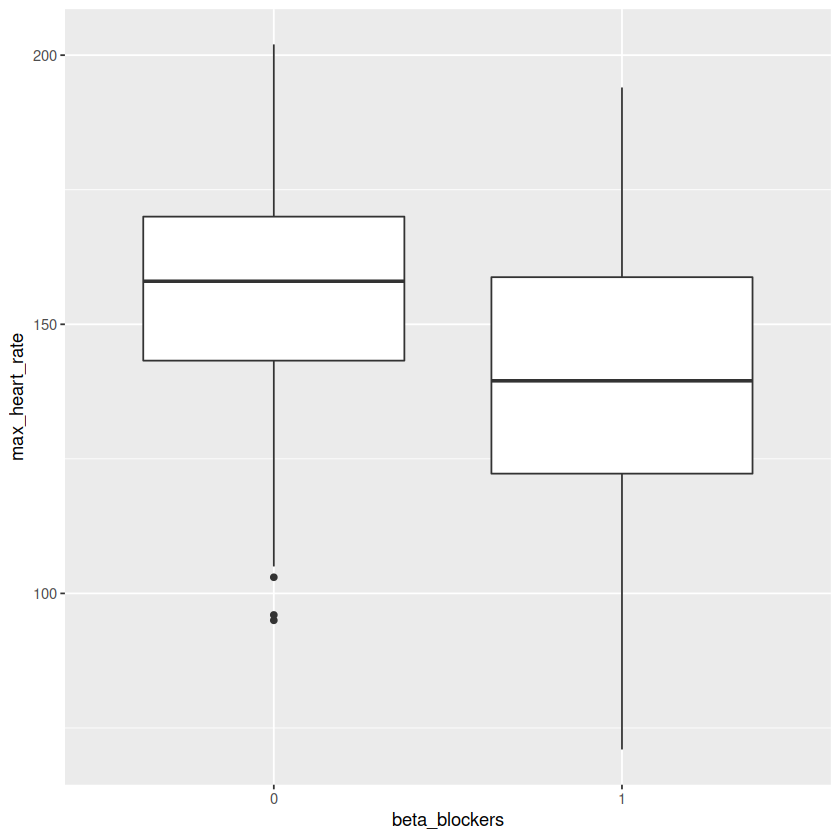

In [8]:
cleaned_cleveland %>%
    ggplot(aes(x = beta_blockers, y = max_heart_rate)) +
    geom_boxplot()

# Some grand title

- 500 words (about 1 page)
- identifies the dataset they plan to work on
- question they would like to answer using that dataset for their group project.
- in a Jupyter notebook, and then submitted both as an .html file (File → Download As → HTML) and an .ipynb file that is reproducible (i.e. works and runs without any additional files).

Only one member of your team needs to submit. 
## Introduction

- provide some relevant background information on the topic so that someone unfamiliar with it will understand your proposal.
- Clearly state the question you will try to answer with your project.
- One random variable of interest, spread across two or more categories that are interesting to compare.
 - examples, consider the annual maxima river flow at two different locations along a river
 - gender diversity at different universities.
- Of the response variable, identify one location parameter (mean, median, quantile, etc.) and one scale parameter (standard deviation, inter-quartile range, etc.) that would be useful in answering your question.
- Justify your choices.
- Identify and describe the dataset that will be used to answer the question.
- this dataset is allowed to contain more variables than you need – feel free to drop them!
- Also, be sure to frame your question/objectives in terms of what is already known in the literature.
- Be sure to include at least two scientific publications that can help frame your study (you will need to include these in the References section).

---You must submit two files:

- the source Jupyter notebook (.ipynb file)

- the rendered final document (.html file)

---


## Introduction

- provide some relevant background information on the topic so that someone unfamiliar with it will understand your proposal.
- Clearly state the question you will try to answer with your project.
- One random variable of interest, spread across two or more categories that are interesting to compare.
 - examples, consider the annual maxima river flow at two different locations along a river
 - gender diversity at different universities.
- Of the response variable, identify one location parameter (mean, median, quantile, etc.) and one scale parameter (standard deviation, inter-quartile range, etc.) that would be useful in answering your question.
- Justify your choices.
- Identify and describe the dataset that will be used to answer the question.
- this dataset is allowed to contain more variables than you need – feel free to drop them!
- Also, be sure to frame your question/objectives in terms of what is already known in the literature.
- Be sure to include at least two scientific publications that can help frame your study (you will need to include these in the References section).

---

## Preliminary Results

- Demonstrate that the dataset can be read from the web into R.
- Clean and wrangle your data into a tidy format.
- Plot the relevant raw data, tailoring your plot in a way that
- addresses your question.
- Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your plot.
- Be sure to not print output that takes up a lot of screen space.




---
## Methods: Plan

The previous sections will carry over to your final report (you’ll be allowed to improve them based on feedback you get). Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?

Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval, with at least one of these being calculated using both bootstrapping and asymptotics for comparison.

Finish this section by reflecting on how your final report might play out:

What do you expect to find?

What impact could such findings have?

What future questions could this lead to?

---


## References

At least two citations of literature relevant to the project. The citation format is your choice – just be consistent. Make sure to cite the source of your data as well.